<a href="https://colab.research.google.com/github/saltfry/21Projects21Days/blob/main/8_Vision_AI_Fundamentals_Building_a_Digit_Recognizer_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [13]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [15]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [16]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [17]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

## Choosing the Right Activation Function
The choice of activation function depends on the type of problem you are trying to solve. Here are some guidelines:

* **For binary classification:**
Use the sigmoid activation function in the output layer. It will squash outputs between 0 and 1, representing probabilities for the two classes.

* **For multi-class classification:**
Use the softmax activation function in the output layer. It will output probability distributions over all classes.

* **If unsure:**
Use the ReLU activation function in the hidden layers. ReLU is the most common default activation function and usually a good choice.

In [18]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [19]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [20]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [21]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=60,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
 992/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7580 - loss: 0.7069
Epoch 1: val_loss improved from inf to 0.46885, saving model to best_ann_model_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7585 - loss: 0.7052 - val_accuracy: 0.8250 - val_loss: 0.4689
Epoch 2/30
 988/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3884
Epoch 2: val_loss improved from 0.46885 to 0.39082, saving model to best_ann_model_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8589 - loss: 0.3883 - val_accuracy: 0.8598 - val_loss: 0.3908
Epoch 3/30
 987/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3439
Epoch 3: val_loss improved from 0.39082 to 0.37571, saving model to best_ann_model_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8726 - loss: 0.3438 - val_accuracy: 0.8639 - val_loss: 0.3757
Epoch 4/30
 978/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [22]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7499 - loss: 0.7104
Epoch 1: val_loss improved from inf to 0.38218, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7500 - loss: 0.7101 - val_accuracy: 0.8626 - val_loss: 0.3822
Epoch 2/30
928/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3431
Epoch 2: val_loss improved from 0.38218 to 0.32974, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8767 - loss: 0.3429 - val_accuracy: 0.8805 - val_loss: 0.3297
Epoch 3/30
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.2899
Epoch 3: val_loss improved from 0.32974 to 0.29822, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8966 - loss: 0.2899 - val_accuracy: 0.8895 - val_loss: 0.2982
Epoch 4/30
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [23]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6509 - loss: 1.0215
Epoch 1: val_loss improved from inf to 0.46099, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6510 - loss: 1.0212 - val_accuracy: 0.8278 - val_loss: 0.4610
Epoch 2/30
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.5054
Epoch 2: val_loss improved from 0.46099 to 0.38809, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8195 - loss: 0.5054 - val_accuracy: 0.8600 - val_loss: 0.3881
Epoch 3/30
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8409 - loss: 0.4416
Epoch 3: val_loss improved from 0.38809 to 0.37430, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8410 - loss: 0.4416 - val_accuracy: 0.8588 - val_loss: 0.3743
Epoch 4/30
936/938 ━━━━━━━━━━━━━━━━━━

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

In [24]:
ann_model.evaluate(test_images,test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8852 - loss: 0.3252


[0.3201476037502289, 0.887499988079071]

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


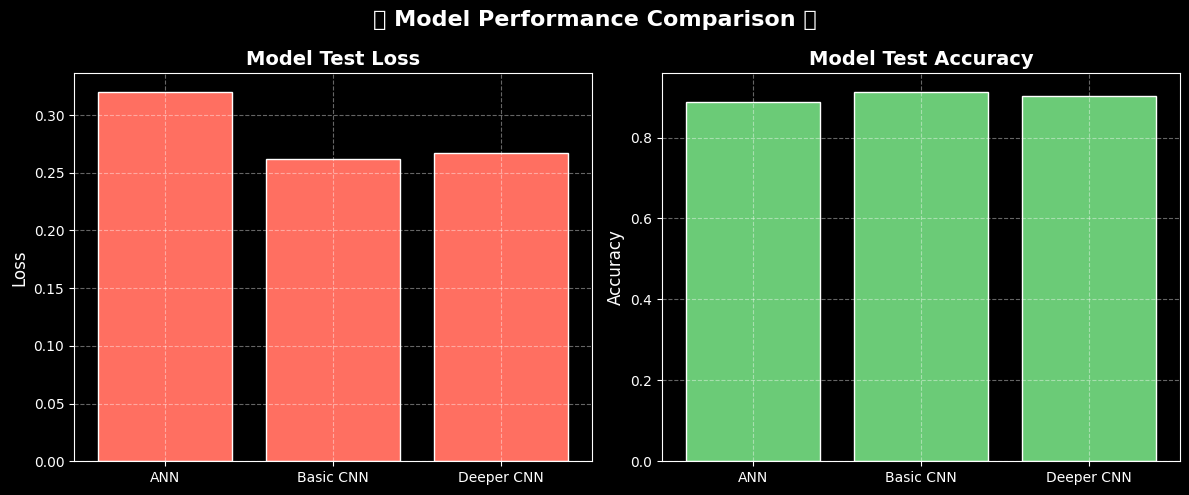

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


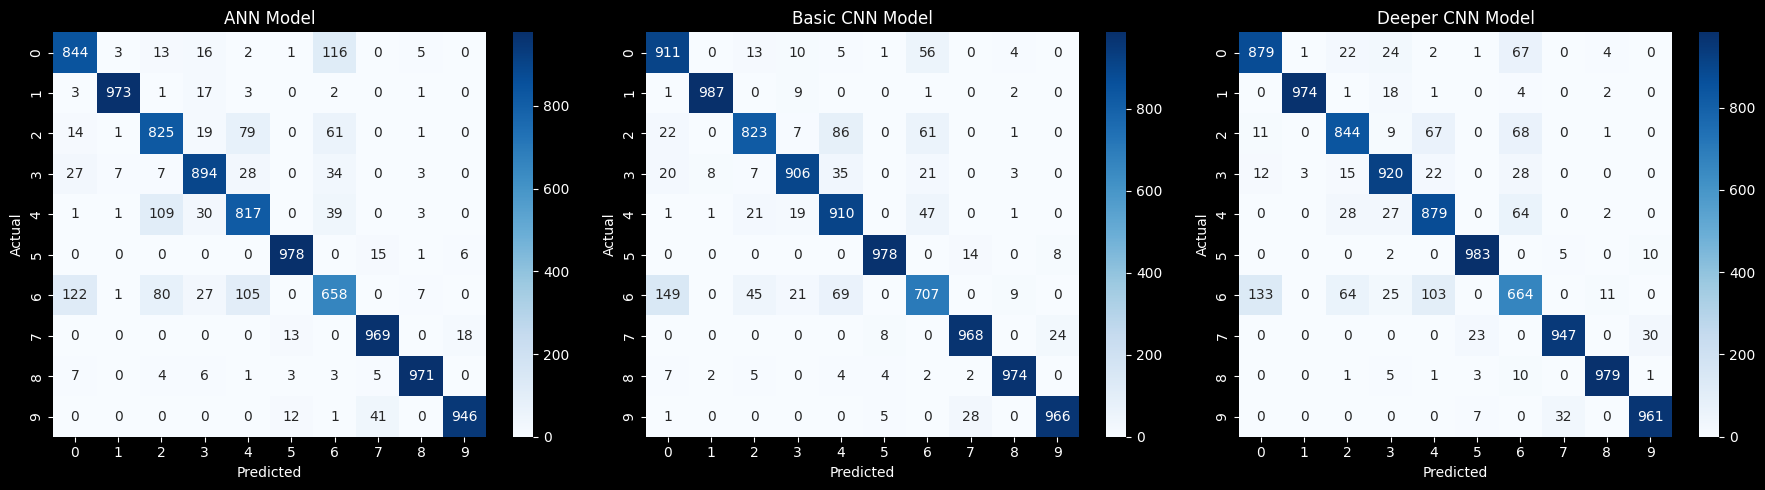

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


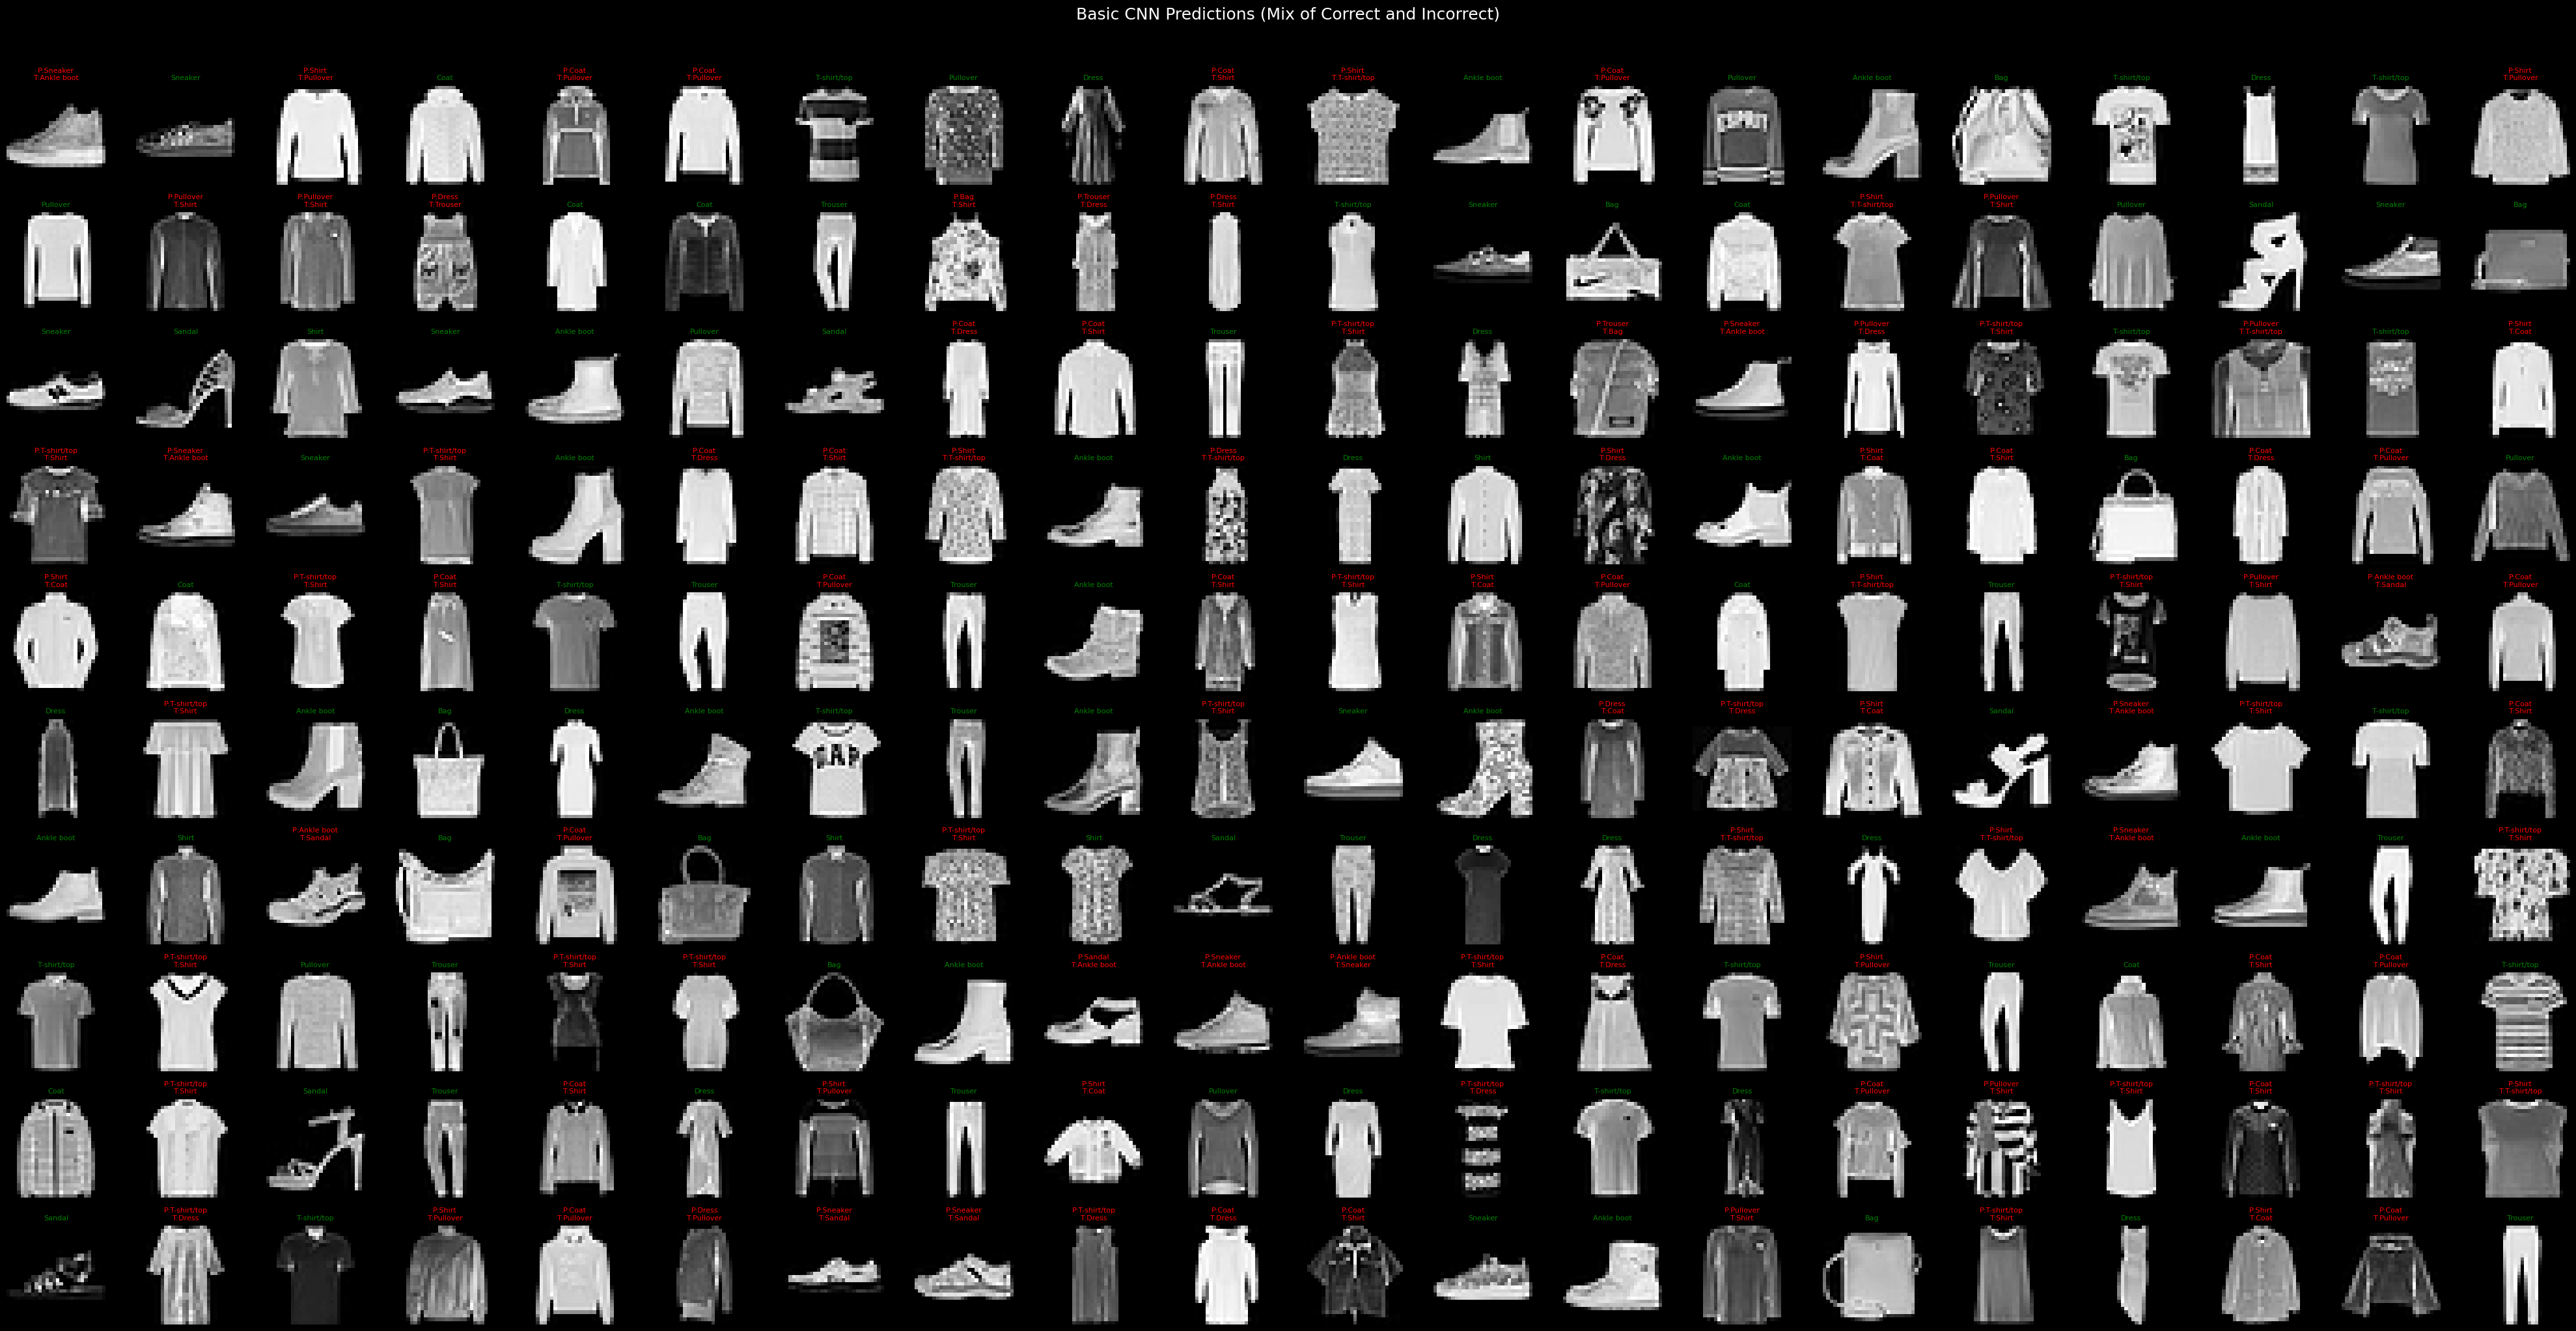

In [28]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [29]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


##solutions

1. imports and dataset loading

In [30]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import confusion_matrix
import seaborn as sns

# loading cifar100 dataset
print("loading data...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

# checking data shape just to be sure
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

loading data...
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


data preprocessing

In [31]:
# normalizing pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encoding the labels for 100 classes
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

print("data preprocessing done")

data preprocessing done


2. model building : ANN

In [32]:
# building the ann model
# input shape is 32x32x3 since its color images
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), # added dropout to help with overfitting
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax') # 100 neurons for 100 classes
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

 Model Building: CNN

In [33]:
# building the cnn model
# increased filters since cifar100 is harder than fashion mnist
cnn_model = models.Sequential([
    # first conv block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # second conv block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # third conv block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,004 (1.59 MB)

 Trainable params: 415,300 (1.58 MB)

 Non-trainable params: 704 (2.75 KB)

Callbacks Setup

In [34]:
# setting up callbacks to save best model and stop early if it stops learning
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# separating checkpoints for ann and cnn
checkpoint_ann = callbacks.ModelCheckpoint(
    'best_ann_cifar100.keras',
    monitor='val_loss',
    save_best_only=True
)

checkpoint_cnn = callbacks.ModelCheckpoint(
    'best_cnn_cifar100.keras',
    monitor='val_loss',
    save_best_only=True
)

3. Training the ANN

In [35]:
# training the ann
print("starting ann training...")
history_ann = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint_ann],
    verbose=1
)

starting ann training...
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0364 - loss: 4.4231 - val_accuracy: 0.0912 - val_loss: 3.9535
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0914 - loss: 3.9422 - val_accuracy: 0.1295 - val_loss: 3.7236
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1158 - loss: 3.7978 - val_accuracy: 0.1444 - val_loss: 3.6644
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1244 - loss: 3.7083 - val_accuracy: 0.1549 - val_loss: 3.5955
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1398 - loss: 3.6564 - val_accuracy: 0.1613 - val_loss: 3.5619
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1462 - loss: 3.5918 - val_accuracy: 0.1791 - val_loss: 3.4910
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1603 - loss: 3.5249 - val_accuracy: 0.1784 - val_loss: 3.4697
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1605 - loss: 

 Training the CNN

In [36]:
# training the cnn
# this might take a while because the model is deeper
print("starting cnn training...")
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=50, # might need more epochs for cifar100
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint_cnn],
    verbose=1
)

starting cnn training...
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.0495 - loss: 4.6268 - val_accuracy: 0.1138 - val_loss: 4.0912
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1480 - loss: 3.6007 - val_accuracy: 0.2320 - val_loss: 3.1891
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2125 - loss: 3.2131 - val_accuracy: 0.2881 - val_loss: 2.8847
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2647 - loss: 2.9183 - val_accuracy: 0.3105 - val_loss: 2.6806
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3062 - loss: 2.7090 - val_accuracy: 0.3508 - val_loss: 2.5185
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3337 - loss: 2.5727 - val_accuracy: 0.4002 - val_loss: 2.2798
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3580 - loss: 2.4498 - val_accuracy: 0.3880 - val_loss: 2.3337
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3760 - loss

8. Visualization Helper Function

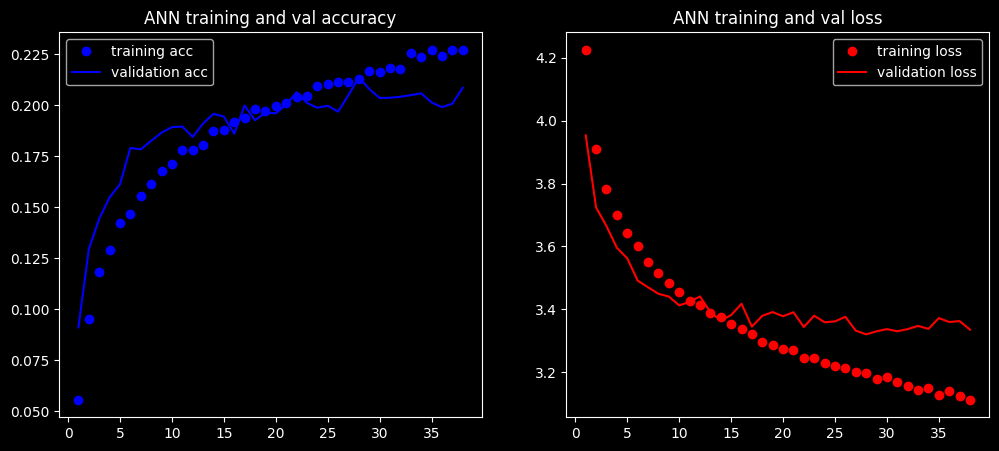

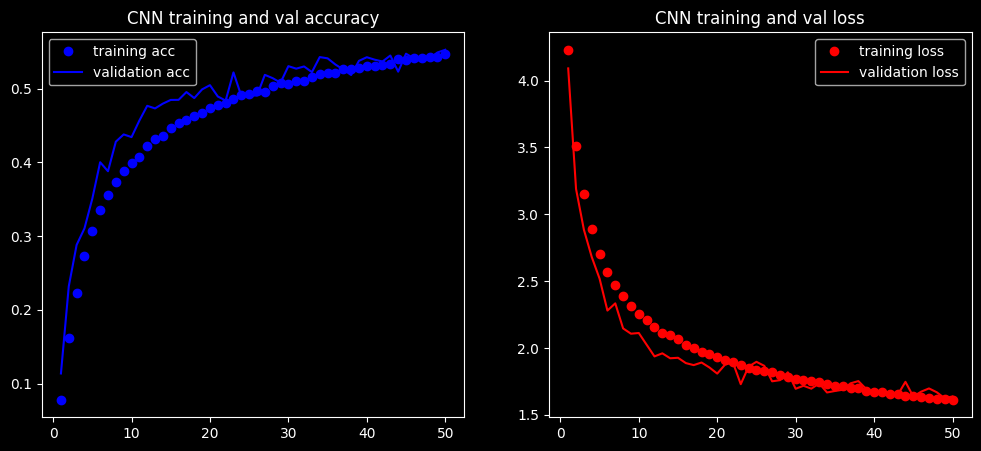

In [37]:
# function to plot loss and accuracy
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='training acc')
    plt.plot(epochs, val_acc, 'b', label='validation acc')
    plt.title(f'{model_name} training and val accuracy')
    plt.legend()

    # loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro', label='training loss')
    plt.plot(epochs, val_loss, 'r', label='validation loss')
    plt.title(f'{model_name} training and val loss')
    plt.legend()

    plt.show()

# plotting results
plot_history(history_ann, "ANN")
plot_history(history_cnn, "CNN")

Model Evaluation & Confusion Matrix

evaluating ann...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2031 - loss: 3.3293
ANN Test Accuracy: 0.2081

evaluating cnn...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5633 - loss: 1.5884
CNN Test Accuracy: 0.5555
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


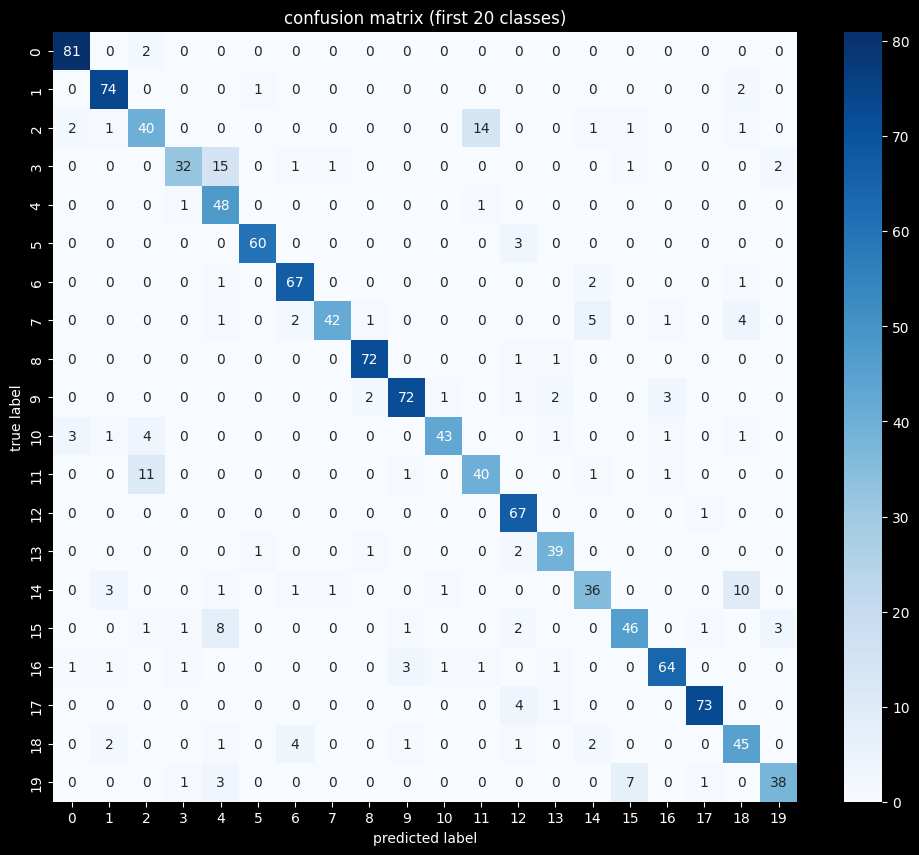

In [38]:
# evaluating both models on test set
print("evaluating ann...")
test_loss_ann, test_acc_ann = ann_model.evaluate(X_test, y_test)
print(f"ANN Test Accuracy: {test_acc_ann:.4f}")

print("\nevaluating cnn...")
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {test_acc_cnn:.4f}")

# generating confusion matrix for cnn
# only plotting the first 20 classes because 100 is too messy to read
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(12, 10))
conf_mat = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_mat[:20, :20], annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix (first 20 classes)')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

5. Prediction Analysis

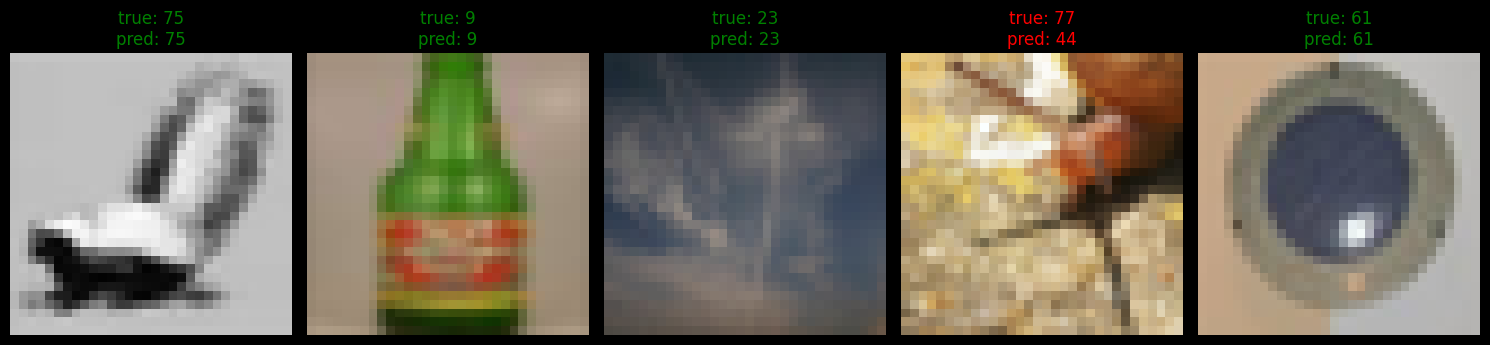

In [39]:
# visualizing some predictions from the cnn
# cifar100 labels are just numbers so mapping a few superclasses for context
# showing first 5 images
num_images = 5
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx])

    true_label = y_true[idx]
    pred_label = y_pred_classes[idx]

    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"true: {true_label}\npred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()